<a href="https://colab.research.google.com/github/tlockhart/project-1/blob/main/EDX_AI_Bootcamp_Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

# Imports for everybody (packages and data)
import pandas as pd
import datetime as dt
from prophet import Prophet
from scipy.stats import linregress
import requests
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
url = 'https://api.github.com/repos/AsaAdomatis/project-1/contents/Runningback Salary Cap 2017-2018.csv'

# Fetch the file using the API
response = requests.get(url)

# Extract the file's content
if response.status_code == 200:
    file_url = response.json()['download_url']
    file_data = requests.get(file_url)

    # Read the CSV data into a pandas DataFrame
    from io import StringIO
    csv_data = StringIO(file_data.text)
    df = pd.read_csv(csv_data)

else:
    print("Failed to fetch file from GitHub API")

# THE DATAFRAME WITH THE ORIGINAL DATA IS CALLED df
df = df.drop('Unnamed: 0', axis=1)
display(df.head())

,Rank,Player,Age,Team,Games Played,Games Started,Attempts,Yards,Touchdowns,First Downs,...,Longest Run,Yards per Attempt,Yards per Game,Attempts per Game,Fumbles,Awards,Year,Position,Cap Hit,Cap%
0,1,Ezekiel Elliott,23,DAL,15.0,15.0,304.0,1434.0,6.0,74.0,...,41.0,4.7,95.6,20.3,6.0,"PB,AP-2",2018,RB,6806274,3.68
1,2,Saquon Barkley,21,NYG,16.0,16.0,261.0,1307.0,11.0,50.0,...,78.0,5.0,81.7,16.3,0.0,"PB,AP ORoY-1",2018,RB,5671773,3.19
2,3,David Johnson,27,ARI,16.0,16.0,258.0,940.0,7.0,51.0,...,53.0,3.6,58.8,16.1,3.0,NaN,2018,RB,5042344,2.82
3,4,Todd Gurley,24,LAR,14.0,14.0,256.0,1251.0,17.0,70.0,...,36.0,4.9,89.4,18.3,1.0,"PB,AP-1,AP OPoY-3",2018,RB,7228306,3.98
4,5,Adrian Peterson,33,WAS,16.0,16.0,251.0,1042.0,7.0,47.0,...,90.0,4.2,65.1,15.7,3.0,AP CPoY-3,2018,RB,630000,0.35


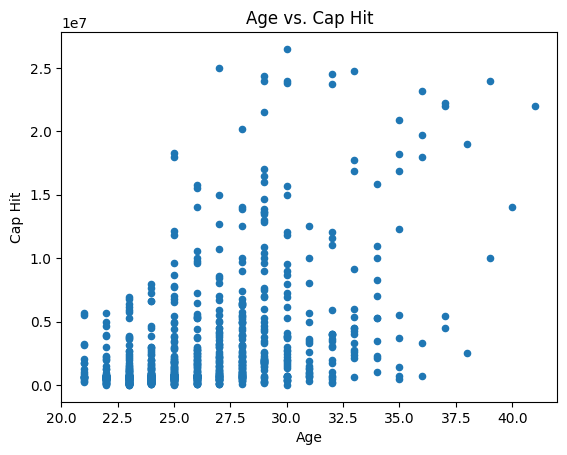

In [ ]:
# Create a Scatter regression Line for age v. salary (Dexter)
df.plot.scatter(x='Age', y='Cap Hit')
plt.title('Age vs. Cap Hit')
plt.xlabel('Age')
plt.ylabel('Cap Hit')
plt.show()

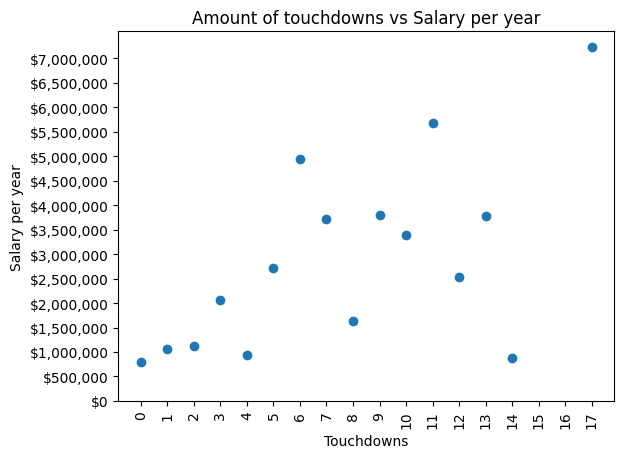

In [ ]:
# touchdowns v. salary (Gerardo)
# All positions
# import numpy as np
# # copy df
# df_TDvsCapHit = pd.DataFrame(
#     df.groupby("Touchdowns")["Cap Hit"]
#     .mean()
#     .sort_values(ascending= True)
#     .reset_index()
#     .copy())
# # assign correct types
# df_TDvsCapHit["Touchdowns"] = df_TDvsCapHit["Touchdowns"]
# df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].astype(float)
# # df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].apply(lambda x: f"${x:,.2f}")
# x_values = df_TDvsCapHit["Touchdowns"]
# y_values = df_TDvsCapHit["Cap Hit"]
# y_min = 0
# y_max = y_values.max()
# y_ticks = np.arange(y_min, y_max, 500000)
# plt.scatter(x_values,y_values)
# x_range = np.arange(x_values.min(), x_values.max() + 1)
# plt.title("Amount of touchdowns vs Salary per year")
# plt.xlabel("Touchdowns")
# plt.ylabel("Salary per year")
# plt.xticks(ticks=x_range, rotation=90)
# plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
# plt.show()

# touchdowns v. salary (Gerardo)
# Only RB
import numpy as np
# copy df
df_RB = df[df['Position'] == 'RB']
df_TDvsCapHit = pd.DataFrame(
    df_RB.groupby("Touchdowns")["Cap Hit"]
    .mean()
    .sort_values(ascending= True)
    .reset_index()
    .copy())
# assign correct types
df_TDvsCapHit["Touchdowns"] = df_TDvsCapHit["Touchdowns"]
df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].astype(float)
# df_TDvsCapHit["Cap Hit"] = df_TDvsCapHit["Cap Hit"].apply(lambda x: f"${x:,.2f}")
x_values = df_TDvsCapHit["Touchdowns"]
y_values = df_TDvsCapHit["Cap Hit"]
y_min = 0
y_max = y_values.max()
y_ticks = np.arange(y_min, y_max, 500000)
plt.scatter(x_values,y_values)
x_range = np.arange(x_values.min(), x_values.max() + 1)
plt.title("Amount of touchdowns vs Salary per year")
plt.xlabel("Touchdowns")
plt.ylabel("Salary per year")
plt.xticks(ticks=x_range, rotation=90)
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.show()

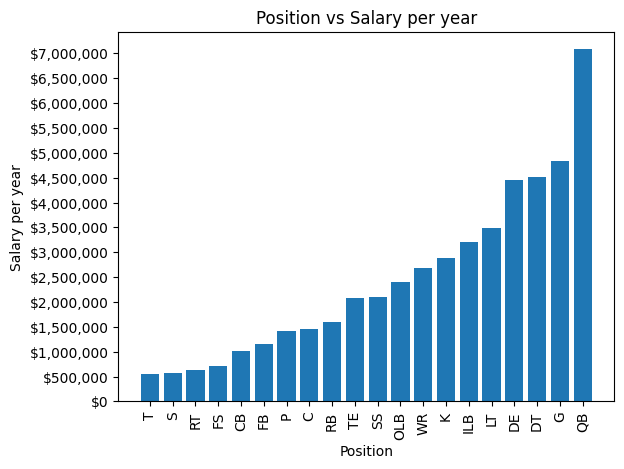

In [ ]:
# position v. salary (Gerardo)
df_PosvsCapHit = pd.DataFrame(
    df.groupby("Position")["Cap Hit"]
    .mean()
    .sort_values(ascending= True)
    .reset_index()
    .copy())
df_PosvsCapHit["Cap Hit"] = df_PosvsCapHit["Cap Hit"].astype(float)
y_min = 0
y_max = y_values.max()
y_ticks = np.arange(y_min, y_max, 500000)
x_values = df_PosvsCapHit['Position']
y_values = df_PosvsCapHit['Cap Hit']
plt.bar(x_values,y_values)
plt.title("Position vs Salary per year")
plt.xlabel("Position")
plt.ylabel("Salary per year")
plt.xticks(rotation=90)
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])
plt.show()

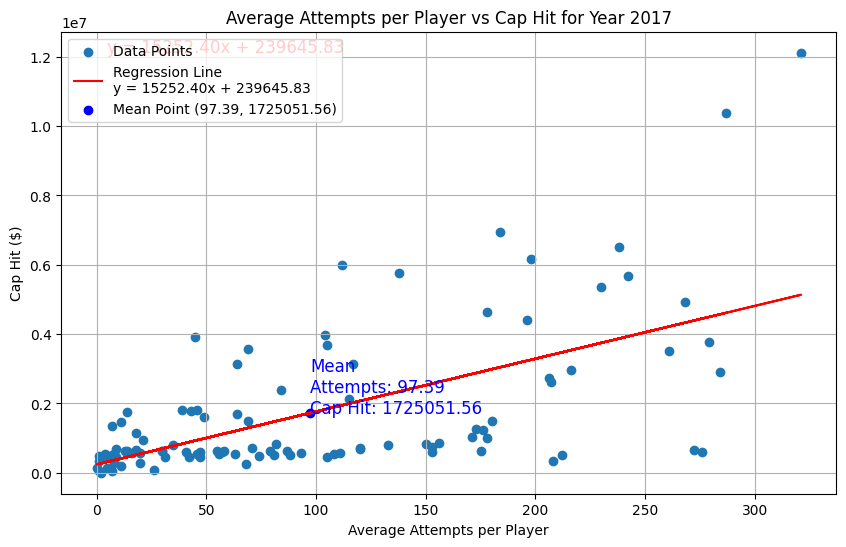

Year 2017 - R-value: 0.6120
Year 2017 - R-squared value: 0.3746
Year 2017 - P-value: 0.0000


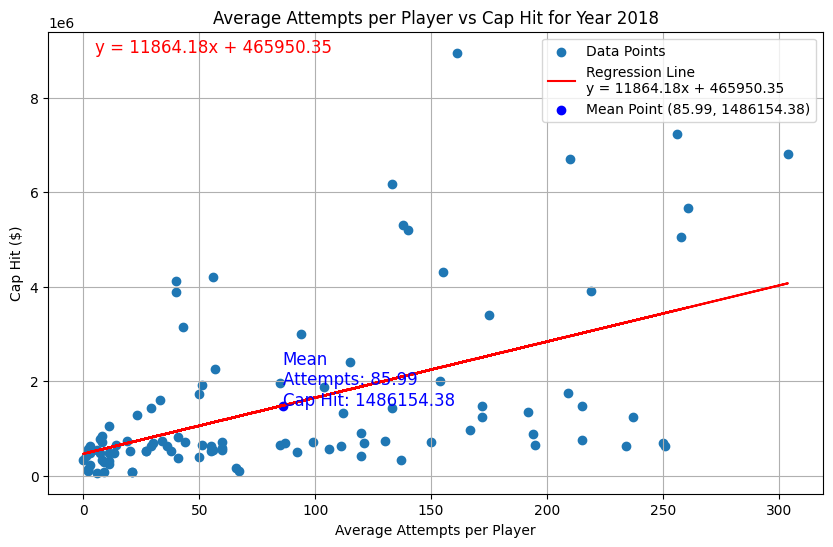

Year 2018 - R-value: 0.5233
Year 2018 - R-squared value: 0.2739
Year 2018 - P-value: 0.0000


In [ ]:
# rush attempts v. salary (Tony)
# Start: Part 2: Visualization 1: 2017 and 2018 Individual Year Visualizations: Avg. Rush Attempts v. Salary, scatter, regression line
"""
I) Pearson Correlation Coeffiecient rvalue Guide:
####################################################
rvalue of .45 is a positive correlation, but since less than 1,
it is a weaker positive correlation. If rvalue < 0.3, it is small to no correlation.
Rvalue of .4 to .5, is considered mild correlation. rvalue of .5 to 1 is considered
a strong correlation.

II)Fit of Determination Guide:
####################################################
R-Squared indicates the proportion of variance (how far the data is from the mean)
in the model. The closer R-squared is to 1, the better the model explains a large
portion of the data.

III) Significance Guide:
####################################################
The pvalue indicates whether the regression relationship is statistically significant.
The pvalue tests the null hypothesis that the slope of the regression line is zero
(no relationship). A small pvalue (typically  p < 0.05 ) suggests that the
relationship is statistically significant, meaning there is evidence of a linear
association between x_values and y_values.

2017 Analysis:
####################################################
	1.	Pearson Correlation Coefficient (r-value): The Pearson correlation coefficient
  of 0.6120 indicates a moderate positive correlation between “Rushing Attempts”
  and “Cap Hit.” This suggests that there is a moderate relationship between the
  number of rushing attempts and the associated cap hit for players in 2017.
	2.	Fit of Determination (R-squared): The R-squared value of 0.3746 implies that
  approximately 37.46% of the variance in “Cap Hit” can be explained by “Rushing
  Attempts.” This is a notable percentage, indicating a moderate degree of fit
  between the two variables.
	3.	Data Significance: The p-value of 0.0000 (p < 0.05) indicates that the
  relationship between “Rushing Attempts” and “Cap Hit” is statistically
  significant. This suggests that the correlation observed is not due to random
  chance and is meaningful within the context of the data.

2018 Analysis:
####################################################
	1. The Pearson correlation coefficient of 0.5233 indicates a moderate positive
  correlation between “Rushing Attempts” and “Cap Hit.” This suggests a moderate
  relationship where an increase in rushing attempts is somewhat associated with
  an increase in the cap hit for players in 2018.
	2.	Fit of Determination (R-squared): The R-squared value of 0.2739 implies
  that approximately 27.39% of the variance in “Cap Hit” can be explained by
  “Rushing Attempts.” This represents a more meaningful relationship than what
  was seen in 2017, but still leaves a significant portion of the variance
  unexplained.
	3.	Data Significance: The p-value of 0.0000 (p < 0.05) indicates that the
  relationship between “Rushing Attempts” and “Cap Hit” is statistically
  significant. This suggests that the correlation observed is not due to random
  chance and that there is a notable relationship between the two variables in 2018.
"""
# Step 1: Request Running Back Stats
rb_data_url = "https://github.com/AsaAdomatis/project-1/raw/refs/heads/main/Runningback%20Salary%20Cap%202017-2018.csv"

df_rb_stats_salary_2017_2018 = pd.DataFrame()

response = requests.get(rb_data_url)
if response.status_code == 200:
    csv_content = StringIO(response.text)
    df_rb_stats_salary_2017_2018 = pd.read_csv(csv_content)
else:
    print("Failed to fetch file from GitHub API")

# Step 2: Drop the 'Unnamed: 0' column from the DataFrame
df_rb_stats_salary_2017_2018 = df_rb_stats_salary_2017_2018.drop(columns=['Unnamed: 0'])

# Step 3: Check the data
# display(len(df_rb_stats_salary_2017_2018))
# display(df_rb_stats_salary_2017_2018.head())
# display(df_rb_stats_salary_2017_2018.columns)

# Step 4: Prepare data by grouping by Year and Player, calculating mean attempts and cap hit
player_year_data = df_rb_stats_salary_2017_2018.groupby(["Year", "Player","Position"]).agg({
    "Attempts": "mean",
    "Cap Hit": "mean"
}).sort_values("Player", ascending=False).reset_index()

# Step 4A: Iterate through each year (2017-2018) and plot the data
unique_years = np.sort(player_year_data["Year"].unique())

# display(player_year_data.head())

# Create a plot for each year
for year in unique_years:
    # Filter data for the current year
    year_data = player_year_data[player_year_data["Year"] == year]
    # x_values = year_data["Attempts"]
    x_values = year_data.loc[year_data['Position'] == 'RB']['Attempts']
    # y_values = year_data["Cap Hit"]
    y_values = year_data.loc[year_data['Position'] == 'RB']['Cap Hit']


    # Perform regression analysis
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, label="Data Points")
    plt.plot(x_values, regress_values, color="red", label=f"Regression Line\n{line_eq}")

    # Mark the mean point
    mean_x = x_values.mean()
    mean_y = y_values.mean()
    plt.scatter(mean_x, mean_y, color="blue", label=f"Mean Point ({mean_x:.2f}, {mean_y:.2f})")

    # Add labels and title
    plt.xlabel("Average Attempts per Player")
    plt.ylabel("Cap Hit ($)")
    plt.title(f"Average Attempts per Player vs Cap Hit for Year {year}")

    # Annotate the mean values
    plt.text(mean_x + 0.05, mean_y, f"Mean\nAttempts: {mean_x:.2f}\nCap Hit: {mean_y:.2f}", fontsize=12, color="blue")

    # Add regression equation annotation at a reasonable location
    plt.annotate(line_eq, (x_values.min() + 5, y_values.max() - 10), fontsize=12, color="red")

    # Add legend and grid
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print R-squared value for this year's regression
    print(f"Year {year} - R-value: {rvalue:.4f}")
    print(f"Year {year} - R-squared value: {rvalue**2:.4f}")
    print(f"Year {year} - P-value: {pvalue:.4f}")

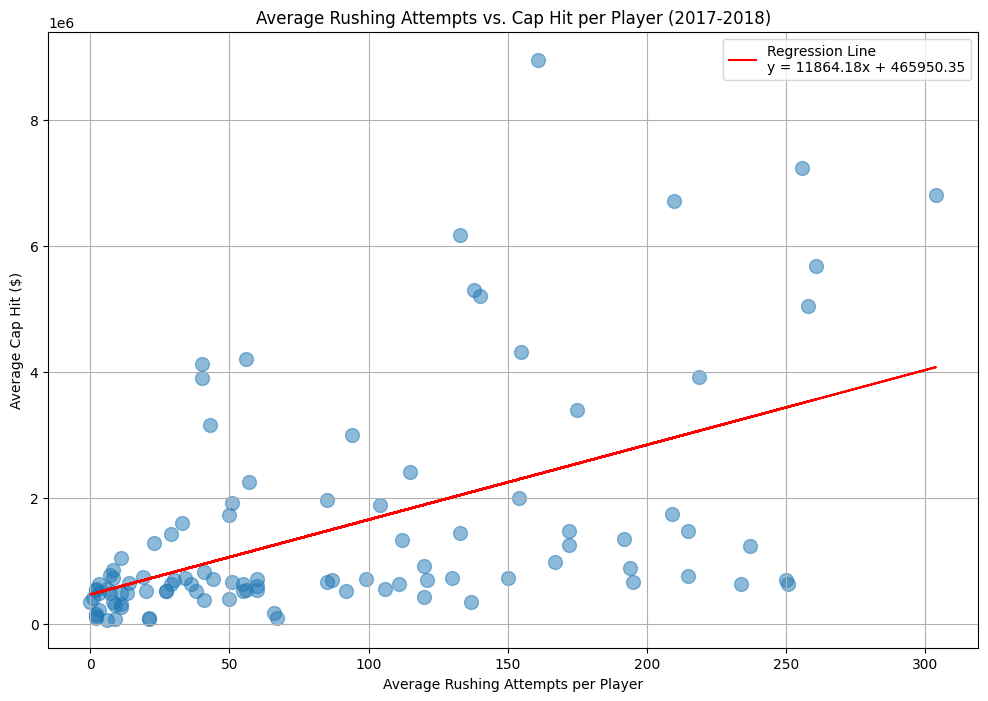

Overall R-value: 0.5233
Overall R-squared value: 0.2739
Overall P-value: 0.0000


In [ ]:
# 2017-2018 NFL Running Back Average Rushing Attempts and AVG Cap Hit, by Player:
# Part 2: Visualization 2: 2017-2018 NFL Running Back Average Rushing Attempts
# and Average Cap Hit, by player (2 data point 2017 and 2018 data)

player_data = df_rb_stats_salary_2017_2018.groupby(["Player"])[["Attempts", "Cap Hit"]].mean().reset_index()


# Step 2 Prepare the mean data for plotting
# x_values = player_data["Attempts"]
x_values = year_data.loc[year_data['Position'] == 'RB']['Attempts']
# y_values = year_data["Cap Hit"]
y_values = year_data.loc[year_data['Position'] == 'RB']['Cap Hit']

# Optional: Display player data (consider using head() for large datasets)
# display(player_data.info())
# display(player_data.head())

# Step 3: Regression analysis and plotting
"""
Combined 2017 and 2018 Averages Rushing Attempts and AVG Cap Hit Per Player Analysis:
####################################################
	1.	Pearson Correlation Coefficient (r-value): The Pearson Correlation
  Coefficient (r-value) of 0.5233 indicates a moderate positive correlation.
  This suggests that, when considering both 2017 and 2018 data together, there
  is a moderate linear relationship between “Rushing Attempts” and “Cap Hit.”
	2.	Fit of Determination (R-squared): The R-squared value of 0.2739 (or 27.39%)
  implies that 27.39% of the variance in “Cap Hit” can be explained by “Rushing
  Attempts.” This represents a moderate explanatory power, indicating that while
  there is some significant relationship, a large proportion of the variance
  remains unexplained.
	3.	Data Significance: The p-value of 0.0000 (p < 0.05) suggests that the
  relationship between “Rushing Attempts” and “Cap Hit” is statistically significant.
  This result confirms that the relationship is meaningful in a statistical sense
  and is unlikely to be due to random chance. The relationship is not perfect,
  but it is more than just a fluke, as indicated by the low p-value.
"""
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plt.scatter(x_values, y_values, s=100, alpha=0.5)  # Plot individual player data

plt.plot(x_values, regress_values, color="red", label=f"Regression Line\ny = {slope:.2f}x + {intercept:.2f}")

# Step 4: Annotate and finalize plot
plt.xlabel("Average Rushing Attempts per Player")
plt.ylabel("Average Cap Hit ($)")
plt.title("Average Rushing Attempts vs. Cap Hit per Player (2017-2018)")
plt.legend()
plt.grid(True)

# Annotate is not recommended for many data points (consider alternative)
# plt.annotate(line_eq, (x_values, y_values), fontsize=12, color="red")

plt.show()

# Print R-squared value
print(f"Overall R-value: {rvalue:.4f}")
print(f"Overall R-squared value: {rvalue**2:.4f}")
print(f"Overall P-value: {pvalue:.4f}")


Filtered Data:


<ipython-input-48-cff8cdc4a5b5>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_player_year_data["Year"] = filtered_player_year_data["Year"].apply(convert_year_to_date)


,ds,y,Position
2,2017-09-07,14.0,RB
3,2018-09-06,55.0,RB
15,2018-09-06,87.0,RB
16,2017-09-07,47.0,RB
17,2018-09-06,51.0,RB


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn3csazb5/5gv6j9dl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn3csazb5/_886vmt4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4377', 'data', 'file=/tmp/tmpn3csazb5/5gv6j9dl.json', 'init=/tmp/tmpn3csazb5/_886vmt4.json', 'output', 'file=/tmp/tmpn3csazb5/prophet_modelf393fjba/prophet_model-20241213034123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:41:23 - cmdstanpy - INFO - Chain 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-09-07,95.574540,-23.018778,209.407518,95.574540,95.574540,0.0,0.0,0.0,0.0,0.0,0.0,95.574540
1,2018-09-06,83.591523,-31.070961,192.035102,83.591523,83.591523,0.0,0.0,0.0,0.0,0.0,0.0,83.591523
2,2018-09-30,82.498798,-42.075259,193.656305,82.460445,82.535415,0.0,0.0,0.0,0.0,0.0,0.0,82.498798
3,2018-10-31,81.087361,-34.596477,189.967627,80.965840,81.211582,0.0,0.0,0.0,0.0,0.0,0.0,81.087361
4,2018-11-30,79.721455,-36.795931,196.719011,79.484143,79.959790,0.0,0.0,0.0,0.0,0.0,0.0,79.721455


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,
2017-09-07,95.574540,-23.018778,209.407518,95.574540,95.574540,0.0,0.0,0.0,0.0,0.0,0.0,95.574540
2018-09-06,83.591523,-31.070961,192.035102,83.591523,83.591523,0.0,0.0,0.0,0.0,0.0,0.0,83.591523
2018-09-30,82.498798,-42.075259,193.656305,82.460445,82.535415,0.0,0.0,0.0,0.0,0.0,0.0,82.498798
2018-10-31,81.087361,-34.596477,189.967627,80.965840,81.211582,0.0,0.0,0.0,0.0,0.0,0.0,81.087361
2018-11-30,79.721455,-36.795931,196.719011,79.484143,79.959790,0.0,0.0,0.0,0.0,0.0,0.0,79.721455


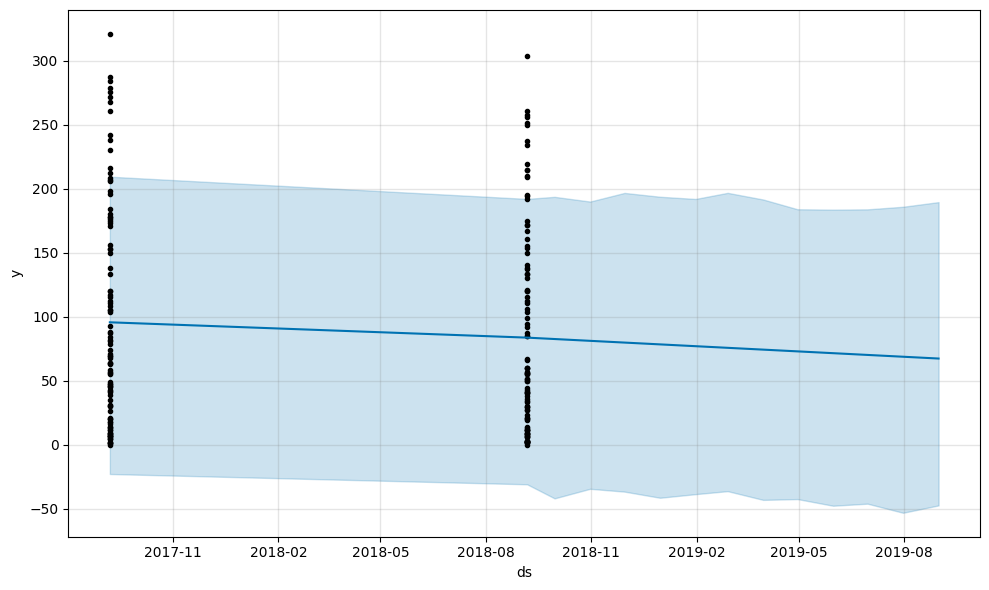

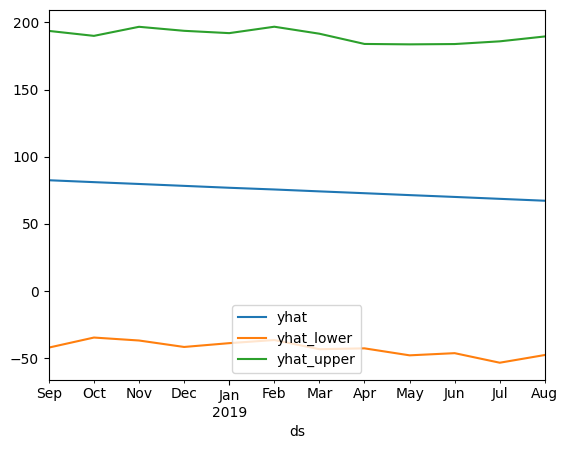

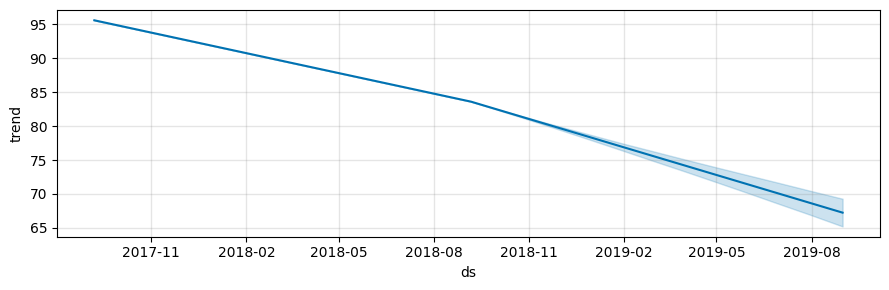

In [ ]:
# rush attempts v. salary + future predictions (Tony)
#################################################################
# Prep data for Plot the predictions: Filter by Year and Attempts
#################################################################

filtered_player_year_data = player_year_data[["Year", "Attempts", "Position"]]


# Covert year to date
def convert_year_to_date(year):
    if year == 2017:
        return pd.to_datetime('2017-09-07')
                  #  return pd.to_datetime('2017')

    elif year == 2018:
        return pd.to_datetime('2018-09-06')
                # return pd.to_datetime('2018')

    else:
        # Handle other years or raise an error
        raise ValueError("Year must be 2017 or 2018")

filtered_player_year_data["Year"] = filtered_player_year_data["Year"].apply(convert_year_to_date)
# filtered_player_year_data['Year'] = filtered_player_year_data['Year'].astype('string')
filtered_player_year_data.reset_index(inplace=True, drop=True)

# Filter the DataFrame to only include rows where the Position is 'RB'
filtered_player_year_data = filtered_player_year_data[filtered_player_year_data['Position'] == 'RB']


# display(filtered_player_year_data.head())

# Prepare training data
filtered_player_year_data.columns = ["ds", "y", "Position"]
filtered_player_year_data = filtered_player_year_data.dropna()

print("Filtered Data:")
display(filtered_player_year_data.head())

# Create Prophet Model
prophet_model = Prophet()
display(prophet_model)

# Step 1: Fit Profit Mode:
prophet_model.fit(filtered_player_year_data)

# Step 2: Create  a future DataFrame to hold predictions, Make the prediction go our as far as a year
future_nfl_rushing_df = prophet_model.make_future_dataframe(periods=12, freq='M')

# Step 3: Build a table of future predictions:
forecast_nfl_rushing_trends = prophet_model.predict(future_nfl_rushing_df)

# Filter data by date:
forecast_nfl_rushing_trends[(forecast_nfl_rushing_trends['ds'] >= '2016-01-01') & (forecast_nfl_rushing_trends['ds'] <= '2020-01-01')]

display(forecast_nfl_rushing_trends.head())


# Step 4: Plot the Prophet model predictions:
# prophet_model.plot(forecast_nfl_rushing_trends);

# Generate the Prophet plot
fig = prophet_model.plot(forecast_nfl_rushing_trends)

################################################
# Step 5: Plot the Trends for the last 12 months:
################################################
# Set Index:
forecast_nfl_rushing_trends = forecast_nfl_rushing_trends.set_index('ds')
display(forecast_nfl_rushing_trends.head())
"""
Analysis: The upper and lower bounds indicate a slight decrease in rushing
attempts for 2019, whereas the best-case prediction suggests a consistent
number of attempts, aligning with the previous two years.
"""
forecast_nfl_rushing_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-12:,:].plot()


#####################################################################
# Step 6: Plot_components to visualize the nfl_rushing_trends forecast
######################################################################
"""
Analysis: The prophet trend indicates a steady decline in the modeled rush attempts over
the observed period. If the trend line continues as shown, it suggests that rush attempts
in 2019 are expected to decrease further compared to 2018.
"""
forecast_nfl_rushing_trends = forecast_nfl_rushing_trends.reset_index()
fig1 = prophet_model.plot_components(forecast_nfl_rushing_trends)


In [ ]:
# rush 2017, 2018, and 2019 actual Rushing Attempts (Tony)

In [ ]:
# rush yards v. salary (Asa)

In [ ]:
# rush yards v. salary + predictions (Asa)

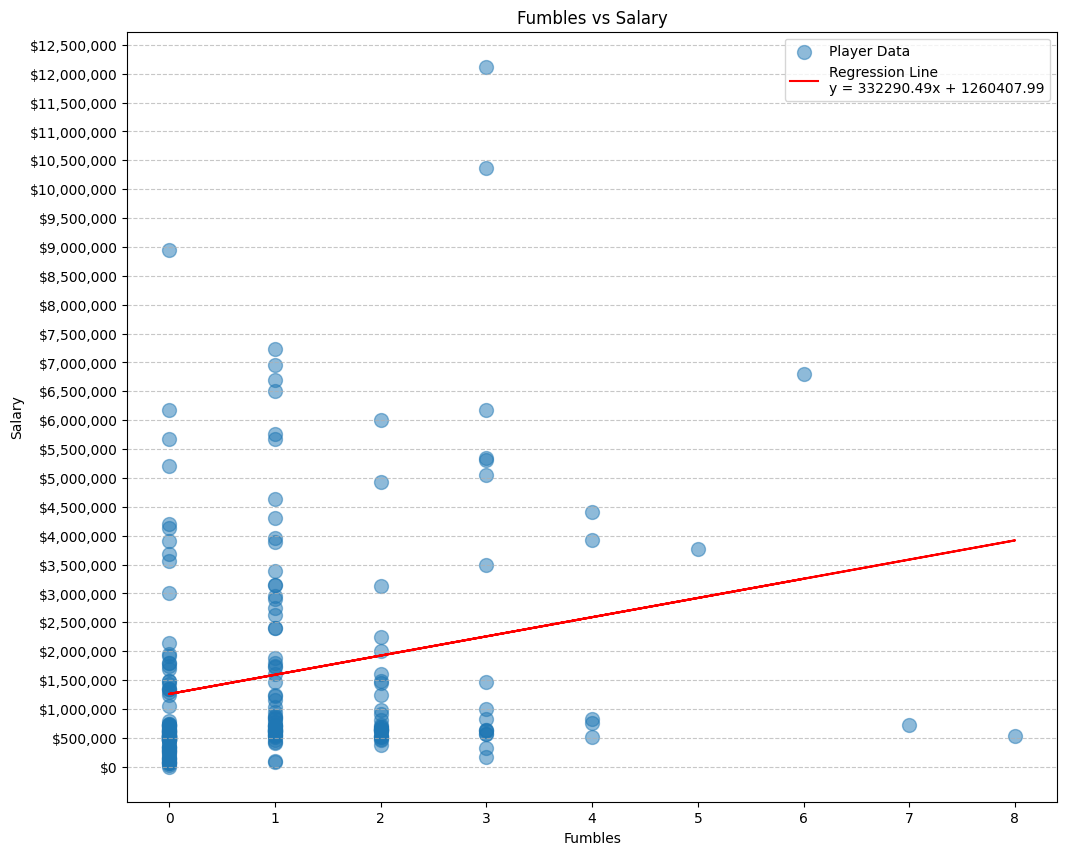

Overall R-value: 0.2216
Overall R-squared value: 0.0491
Overall P-value: 0.0014


In [ ]:
# Fumbles vs. Salary (Whoever finishes first)
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
df_RB = df[df['Position'] == 'RB']
df_FumblevsCapHit = df_RB[["Fumbles", "Cap Hit"]].copy()
df_FumblevsCapHit["Cap Hit"] = df_FumblevsCapHit["Cap Hit"].astype(float)

# Extract x and y values
x_values = df_FumblevsCapHit["Fumbles"]
y_values = df_FumblevsCapHit["Cap Hit"]

# Regression Line
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot
plt.figure(figsize=(12, 10))  # Single figure
plt.scatter(x_values, y_values, s=100, alpha=0.5, label="Player Data")  # Scatter plot
plt.plot(x_values, regress_values, color="red", label=f"Regression Line\n{line_eq}")  # Regression line

# Configure axis
y_min = 0
y_max = y_values.max() + 500000  # Add buffer
y_ticks = np.arange(y_min, y_max, 500000)
x_ticks = np.arange(int(x_values.min()), int(x_values.max()) + 1)

plt.title("Fumbles vs Salary")
plt.xlabel("Fumbles")
plt.ylabel("Salary")
plt.xticks(ticks=x_ticks)
plt.yticks(ticks=y_ticks, labels=[f"${int(y):,}" for y in y_ticks])

# Add legend and grid
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Print R-squared value
print(f"Overall R-value: {rvalue:.4f}")
print(f"Overall R-squared value: {rvalue**2:.4f}")
print(f"Overall P-value: {pvalue:.4f}")